In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import make_classification

In [4]:
X , y = make_classification(n_samples=1000 , n_features=2 ,n_classes=2 , n_clusters_per_class=2 , n_redundant=0)

In [5]:
X

array([[-0.68847703,  1.23241363],
       [ 1.64236132, -1.17615336],
       [ 2.10568099, -2.06502445],
       ...,
       [ 1.32939676, -1.27697973],
       [ 1.04589497, -1.07721499],
       [-2.0906373 ,  0.91125883]])

In [6]:
y

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,

In [8]:
pd.DataFrame(X)[0]

0     -0.688477
1      1.642361
2      2.105681
3      1.111338
4     -1.598206
         ...   
995    1.140168
996    1.607914
997    1.329397
998    1.045895
999   -2.090637
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

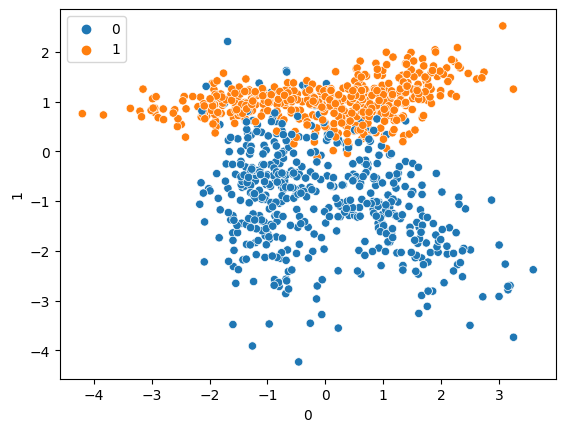

In [9]:
sns.scatterplot(x=pd.DataFrame(X)[0] , y=pd.DataFrame(X)[1] , hue=y)

In [10]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25)

In [11]:
from sklearn.svm import SVC

In [12]:
model=SVC(kernel='linear')

In [13]:
model.fit(X_train , y_train)

SVC(kernel='linear')

In [15]:
y_pred=model.predict(X_test)

In [16]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score , precision_score , recall_score

In [17]:
print(classification_report(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))
print(accuracy_score(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       124
           1       0.90      0.99      0.94       126

    accuracy                           0.94       250
   macro avg       0.95      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

[[110  14]
 [  1 125]]
0.94


In [18]:
print(precision_score(y_test , y_pred))

0.8992805755395683


In [19]:
print(recall_score(y_test , y_pred))

0.9920634920634921


In [20]:
from sklearn.model_selection import GridSearchCV

param_grid={
    'C': [0.1 , 1 , 10 , 100 , 1000] ,
    'gamma' : [1 , 0.1 , 0.01 , 0.001 , 0.0001] ,
    'kernel':['linear']
}

In [21]:
model=SVC()

In [34]:
gscv=GridSearchCV(estimator=model  , param_grid=param_grid , cv=5 , verbose=5 , refit=True)

In [35]:
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.900 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.913 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.953 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.913 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.927 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.900 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.913 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.953 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.913 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.927 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.900 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(cv=5, estimator=SVC(C=1, gamma=1, kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=5)

In [25]:
gscv.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [38]:
model=SVC(C=1 , gamma=1 , kernel='linear' ,probability=True)

In [39]:
model.fit(X_train, y_train)

SVC(C=1, gamma=1, kernel='linear', probability=True)

In [40]:
y_pred=model.predict(X_test)

In [41]:
print(classification_report(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))
print(accuracy_score(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       124
           1       0.90      0.99      0.94       126

    accuracy                           0.94       250
   macro avg       0.95      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

[[110  14]
 [  1 125]]
0.94


In [42]:
print(precision_score(y_test , y_pred))

0.8992805755395683


In [43]:
print(recall_score(y_test , y_pred))

0.9920634920634921


In [44]:
from sklearn.metrics import roc_curve , auc , roc_auc_score

In [60]:
y_proba=model.predict_proba(X_test)

In [61]:
y_proba=y_proba[: , 1].flatten()
y_proba

array([1.47821946e-02, 1.44116842e-01, 6.80602867e-04, 9.95047508e-01,
       3.07428793e-02, 3.79220084e-03, 1.17112164e-03, 8.13902209e-05,
       9.18768828e-01, 5.31845760e-02, 9.97393786e-01, 9.61029513e-01,
       5.32998761e-01, 1.67884813e-03, 9.47628595e-01, 3.53243119e-01,
       5.22160638e-05, 2.20511223e-02, 6.16034887e-03, 9.86013435e-01,
       2.06906208e-01, 9.86689078e-01, 8.19048703e-01, 9.99986586e-01,
       3.61700040e-01, 8.51006139e-01, 9.63861672e-01, 5.00000000e-01,
       9.78714829e-01, 4.51355185e-01, 9.99993175e-01, 8.26063096e-01,
       2.19630565e-01, 5.08189656e-01, 6.76822047e-02, 9.41298768e-01,
       1.52937044e-03, 8.48639970e-01, 9.11895308e-02, 9.77135676e-01,
       1.27823581e-04, 1.78414698e-04, 7.91209484e-01, 9.42084512e-01,
       5.78491440e-01, 6.58884983e-01, 2.24179751e-05, 1.93920845e-02,
       8.47809301e-01, 9.99997223e-01, 5.58491189e-02, 9.50692217e-01,
       9.22161887e-01, 9.03293853e-03, 3.00132025e-01, 1.12272788e-01,
      

In [62]:
roc_curve(y_test , y_proba)

(array([0.        , 0.        , 0.        , 0.00806452, 0.00806452,
        0.01612903, 0.01612903, 0.02419355, 0.02419355, 0.03225806,
        0.03225806, 0.04032258, 0.04032258, 0.0483871 , 0.0483871 ,
        0.05645161, 0.05645161, 0.06451613, 0.06451613, 0.07258065,
        0.07258065, 0.08064516, 0.08064516, 0.14516129, 0.14516129,
        1.        ]),
 array([0.        , 0.00793651, 0.18253968, 0.18253968, 0.26190476,
        0.26190476, 0.47619048, 0.47619048, 0.69047619, 0.69047619,
        0.75396825, 0.75396825, 0.76984127, 0.76984127, 0.84920635,
        0.84920635, 0.85714286, 0.85714286, 0.93650794, 0.93650794,
        0.94444444, 0.94444444, 0.99206349, 0.99206349, 1.        ,
        1.        ]),
 array([1.99999925e+00, 9.99999253e-01, 9.83829842e-01, 9.81505835e-01,
        9.71881689e-01, 9.70983018e-01, 9.40705212e-01, 9.38751993e-01,
        8.86395964e-01, 8.85986920e-01, 8.47809301e-01, 8.45443116e-01,
        8.29884087e-01, 8.27520493e-01, 7.90547429e-01, 7.64

In [63]:
fpr , tpr , thershold  = roc_curve(y_test , y_proba)

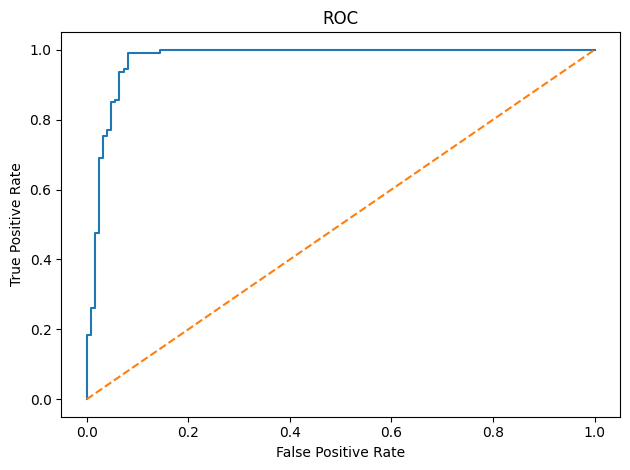

In [69]:
plt.plot(fpr , tpr)
plt.plot([0,1] , linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.tight_layout()
plt.show()